In [2]:
import kagglehub
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from dython.nominal import associations

import matplotlib.pyplot as plt
import seaborn as sns


#download dataset from kagglehub
path = kagglehub.dataset_download("ekkykharismadhany/csecicids2018-cleaned")
print("Files stored successfully!!")

Files stored successfully!!


In [3]:
#load csv to dataframe
df1 = pd.read_csv(path+"/cleaned_ids2018_sampled.csv")

#drop "Label" and "Unnamed" cols and store the df in X
X = df1.drop(columns=['Label', 'Unnamed: 0'])

#classes: 0 for normal traffic and 1 for attack
Y_bin = df1['Label'].apply(lambda x: 0 if x == 1 else 1)

#make the classes to be from 0 to n-1
Y_multi = df1['Label'] - df1['Label'].min()

In [4]:
eda_df = X.copy()
eda_df['target'] = Y_bin.reset_index(drop=True)

# Get correlation of all features with target
correlations = eda_df.corr(numeric_only=True)['target'].abs().sort_values(ascending=False)

top_features = correlations.drop('target').head(16).index.tolist()

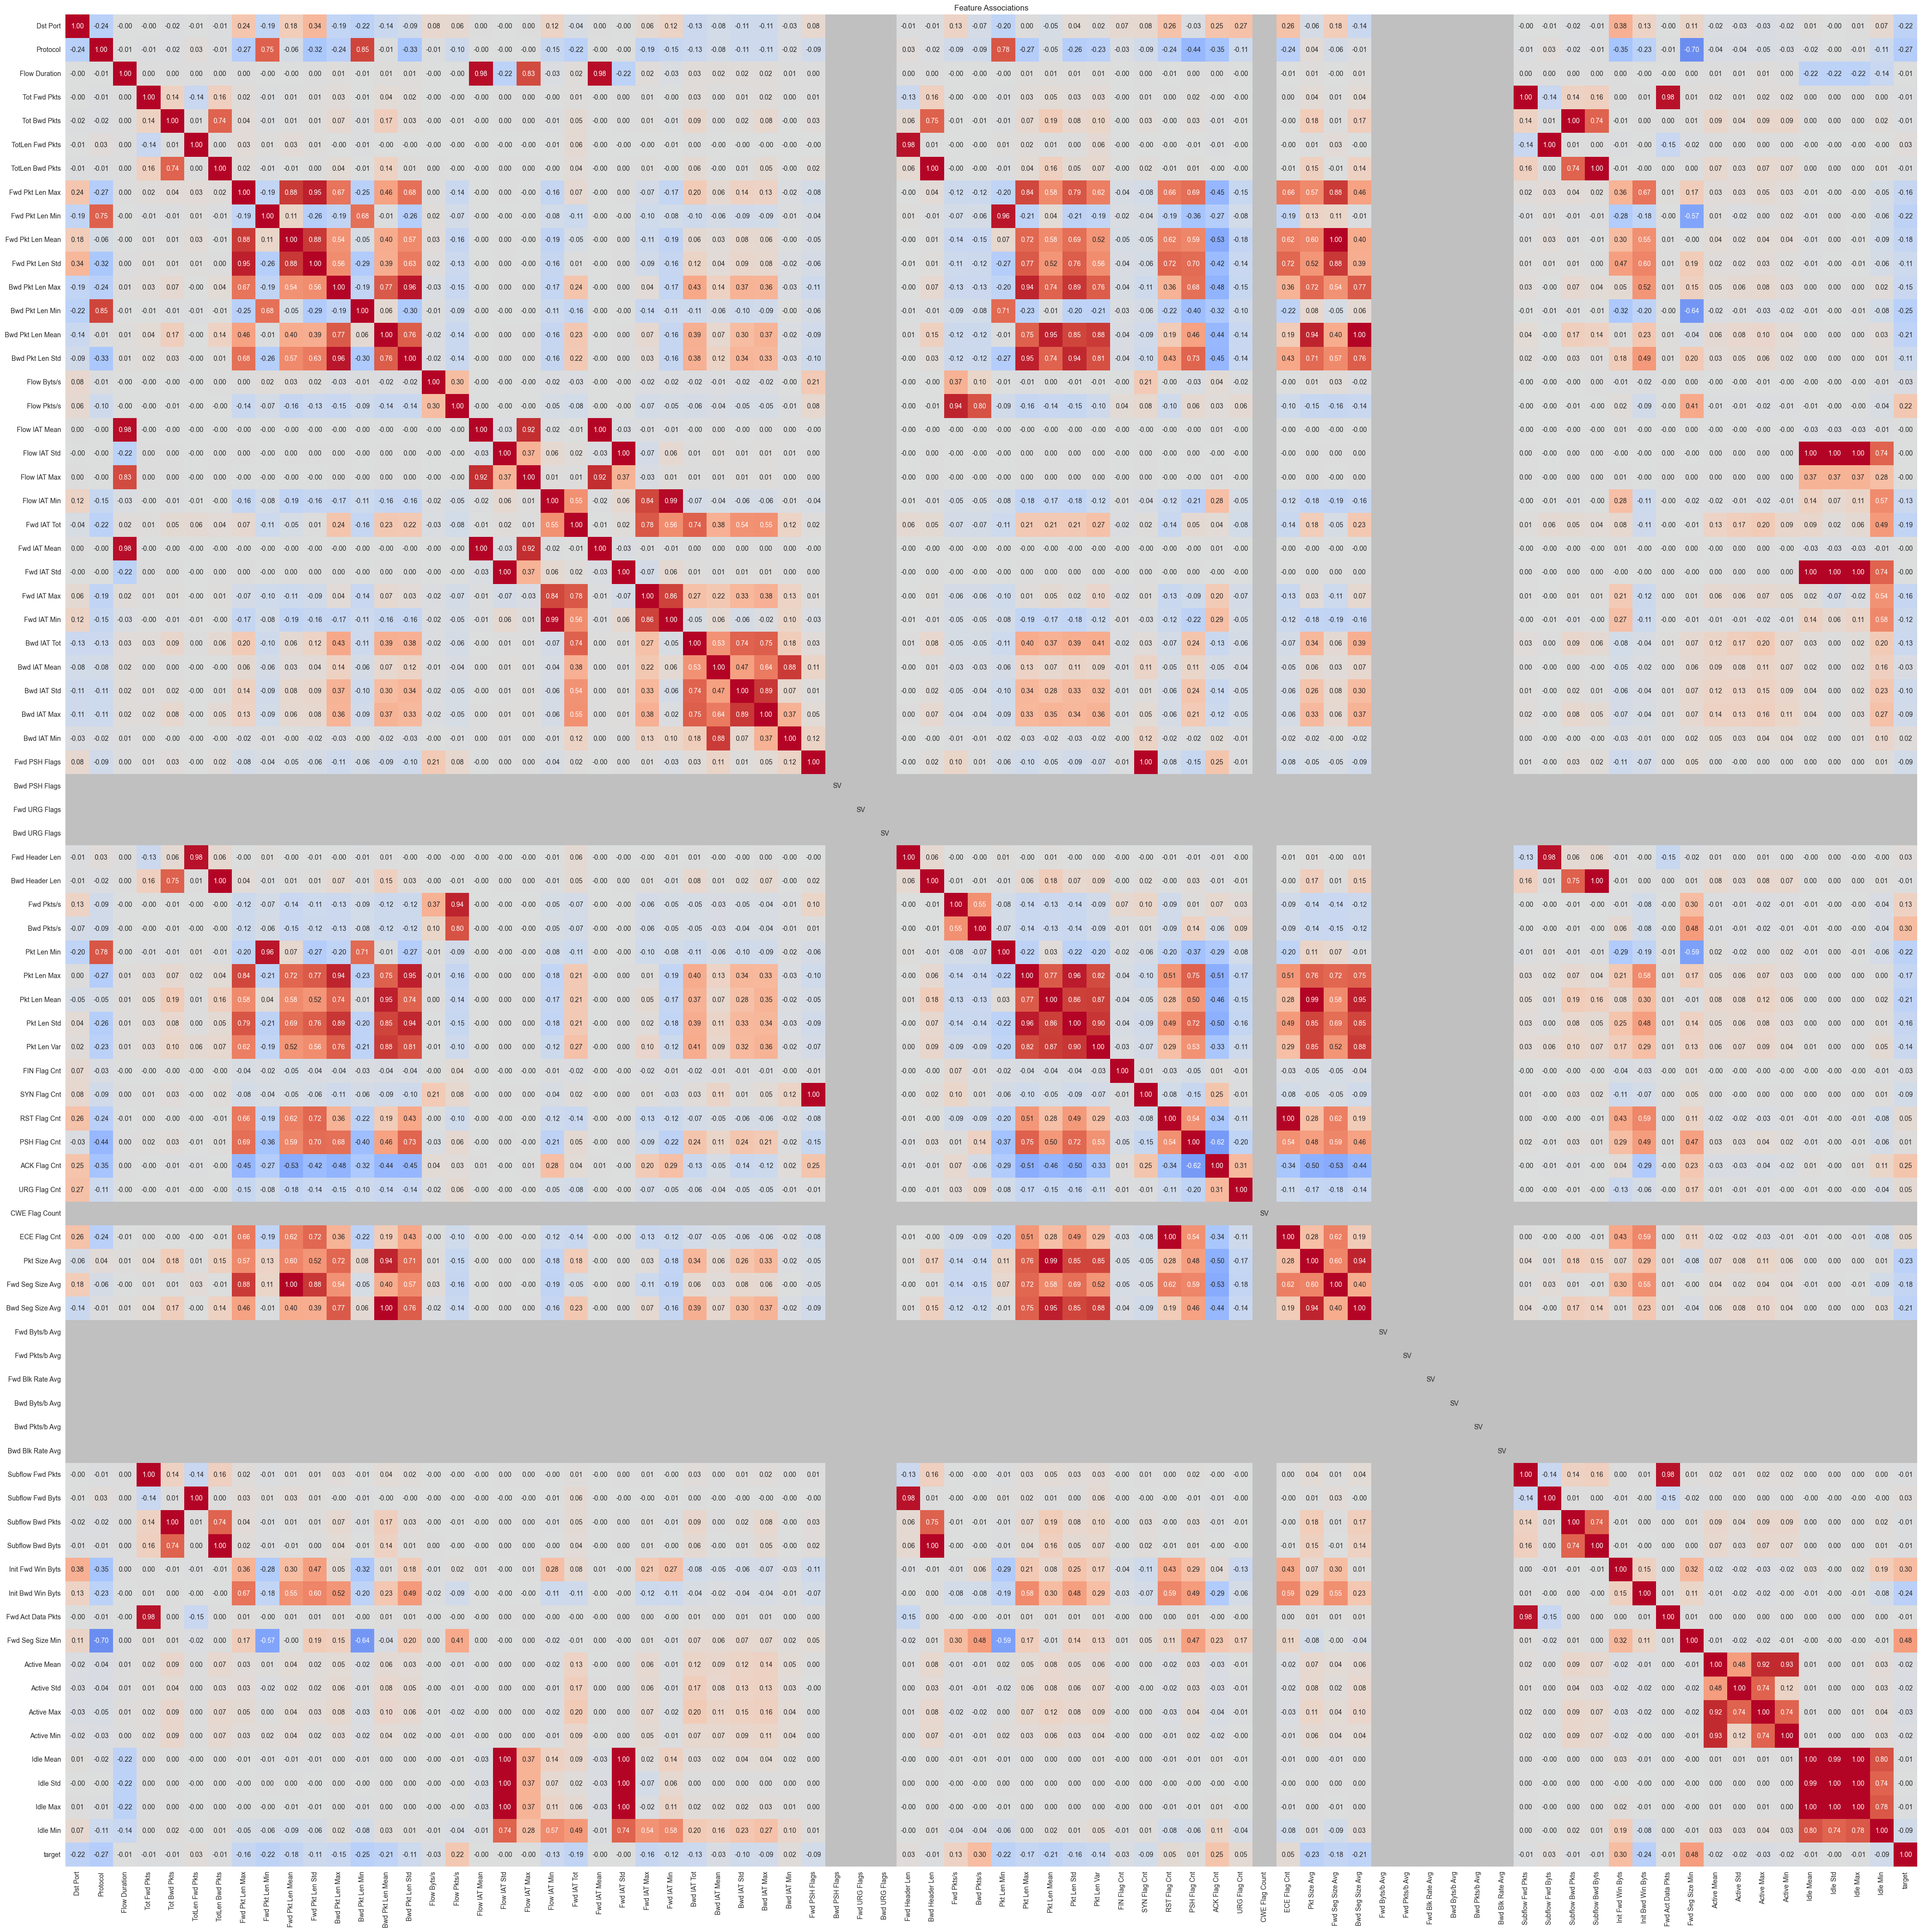

{'corr':                Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
 Dst Port       1.000000 -0.242222      -0.001371     -0.002823     -0.015514   
 Protocol      -0.242222  1.000000      -0.007102     -0.013483     -0.016525   
 Flow Duration -0.001371 -0.007102       1.000000      0.000408      0.002635   
 Tot Fwd Pkts  -0.002823 -0.013483       0.000408      1.000000      0.139380   
 Tot Bwd Pkts  -0.015514 -0.016525       0.002635      0.139380      1.000000   
 ...                 ...       ...            ...           ...           ...   
 Idle Mean      0.009345 -0.018476      -0.217612      0.000805      0.002809   
 Idle Std      -0.000792 -0.001890      -0.221639      0.000121      0.000415   
 Idle Max       0.005406 -0.011979      -0.219448      0.000536      0.001857   
 Idle Min       0.067265 -0.113453      -0.143864      0.004879      0.017343   
 target        -0.216085 -0.268338      -0.007199     -0.009240     -0.013206   
 
                To

In [5]:
# Full heatmap
associations(
    eda_df,
    nominal_columns='auto',
    figsize=(50, 50),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    title="Feature Associations",
    cbar=False  # adds or removes color bar
)

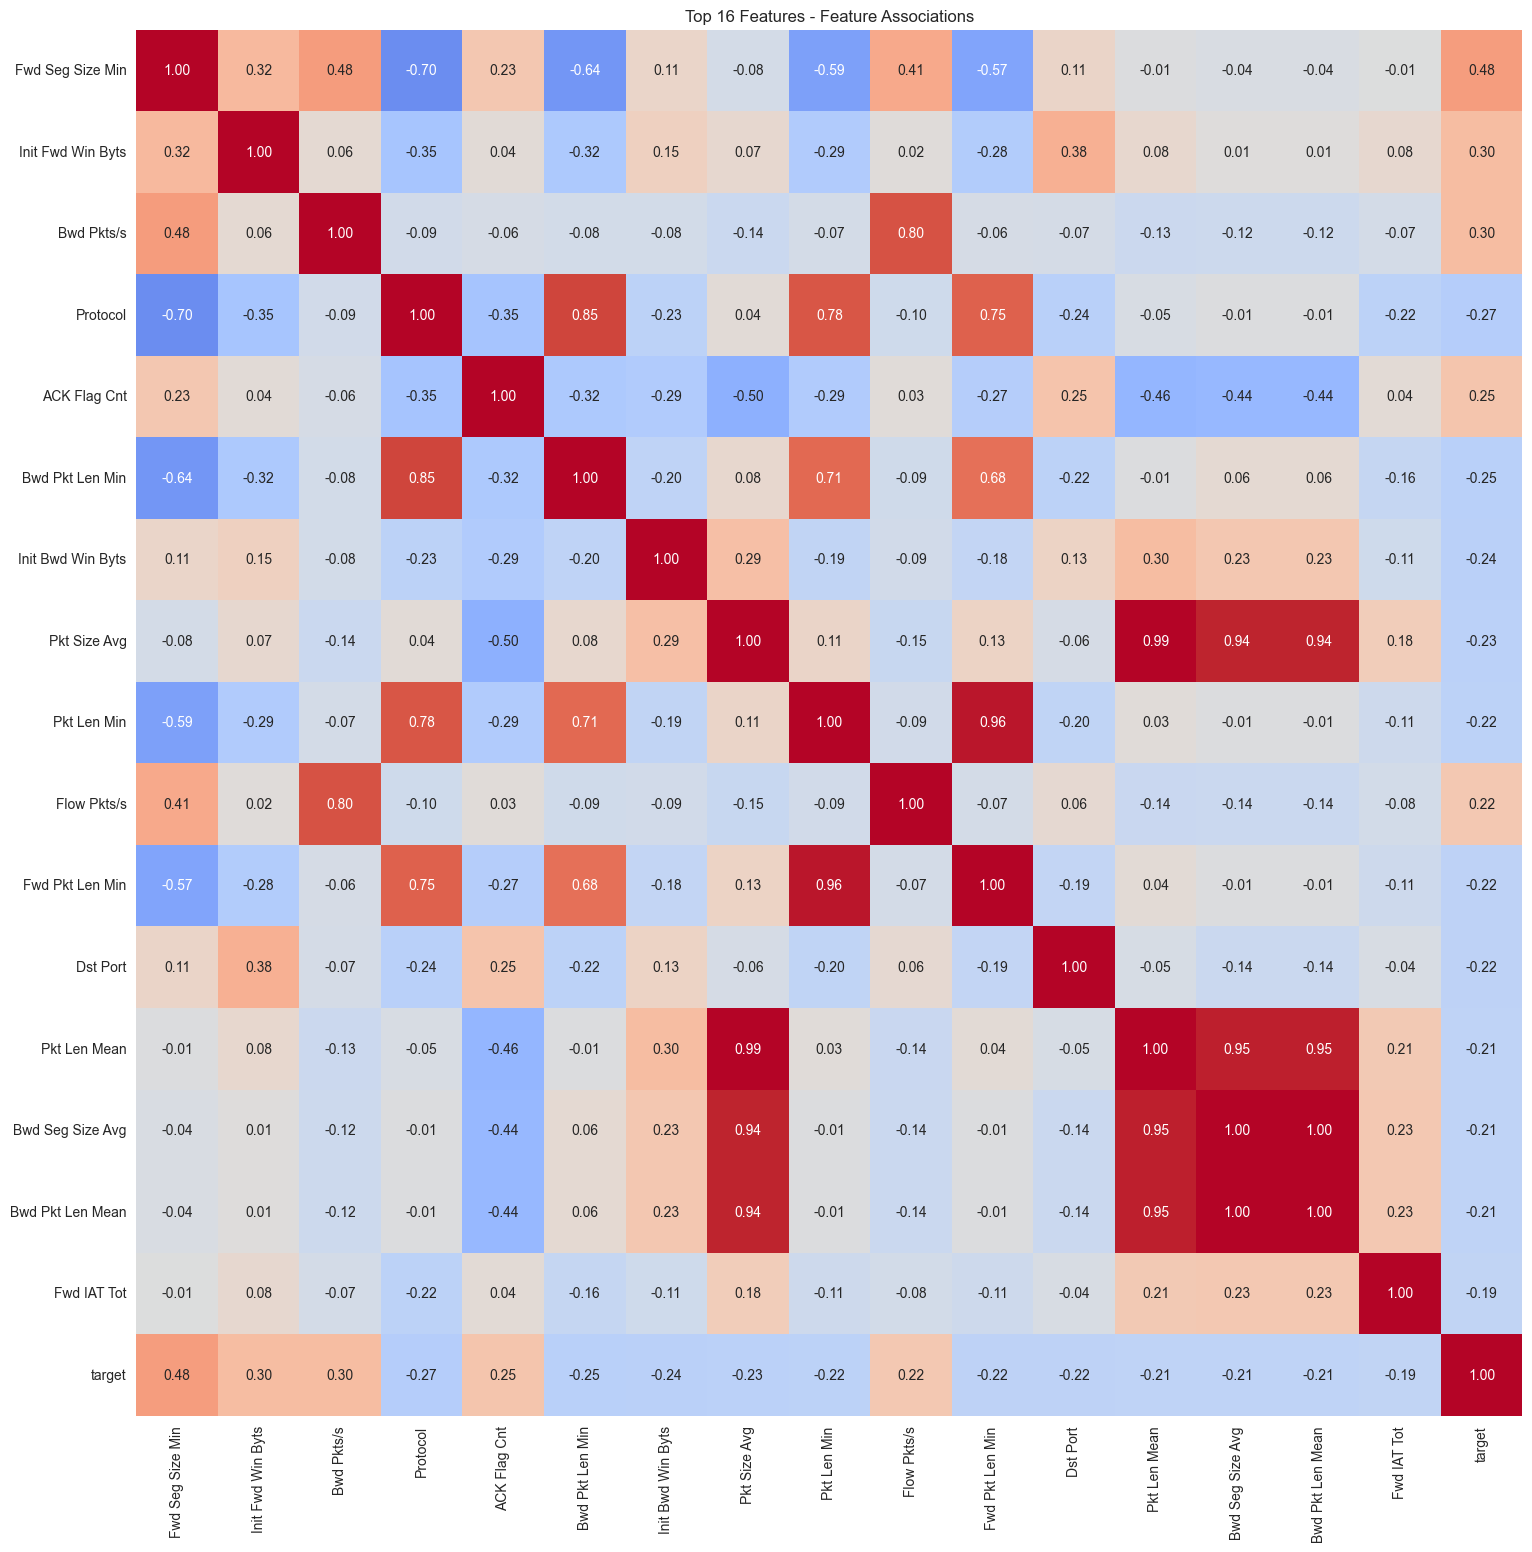

{'corr':                    Fwd Seg Size Min  Init Fwd Win Byts  Bwd Pkts/s  Protocol  \
 Fwd Seg Size Min           1.000000           0.322275    0.484619 -0.695262   
 Init Fwd Win Byts          0.322275           1.000000    0.061032 -0.350785   
 Bwd Pkts/s                 0.484619           0.061032    1.000000 -0.089422   
 Protocol                  -0.695262          -0.350785   -0.089422  1.000000   
 ACK Flag Cnt               0.228171           0.038825   -0.058614 -0.354147   
 Bwd Pkt Len Min           -0.644815          -0.319192   -0.081961  0.851533   
 Init Bwd Win Byts          0.107274           0.150700   -0.081186 -0.225162   
 Pkt Size Avg              -0.076434           0.070403   -0.138735  0.036043   
 Pkt Len Min               -0.592291          -0.293143   -0.074379  0.782197   
 Flow Pkts/s                0.414774           0.016553    0.802719 -0.103444   
 Fwd Pkt Len Min           -0.566562          -0.283609   -0.059010  0.748082   
 Dst Port           

In [6]:
# Subset DataFrame for heatmap
subset_df = eda_df[top_features + ['target']]

associations(
    subset_df,
    nominal_columns='auto',
    figsize=(18, 18),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    title="Top 16 Features - Feature Associations",
    cbar=False
)

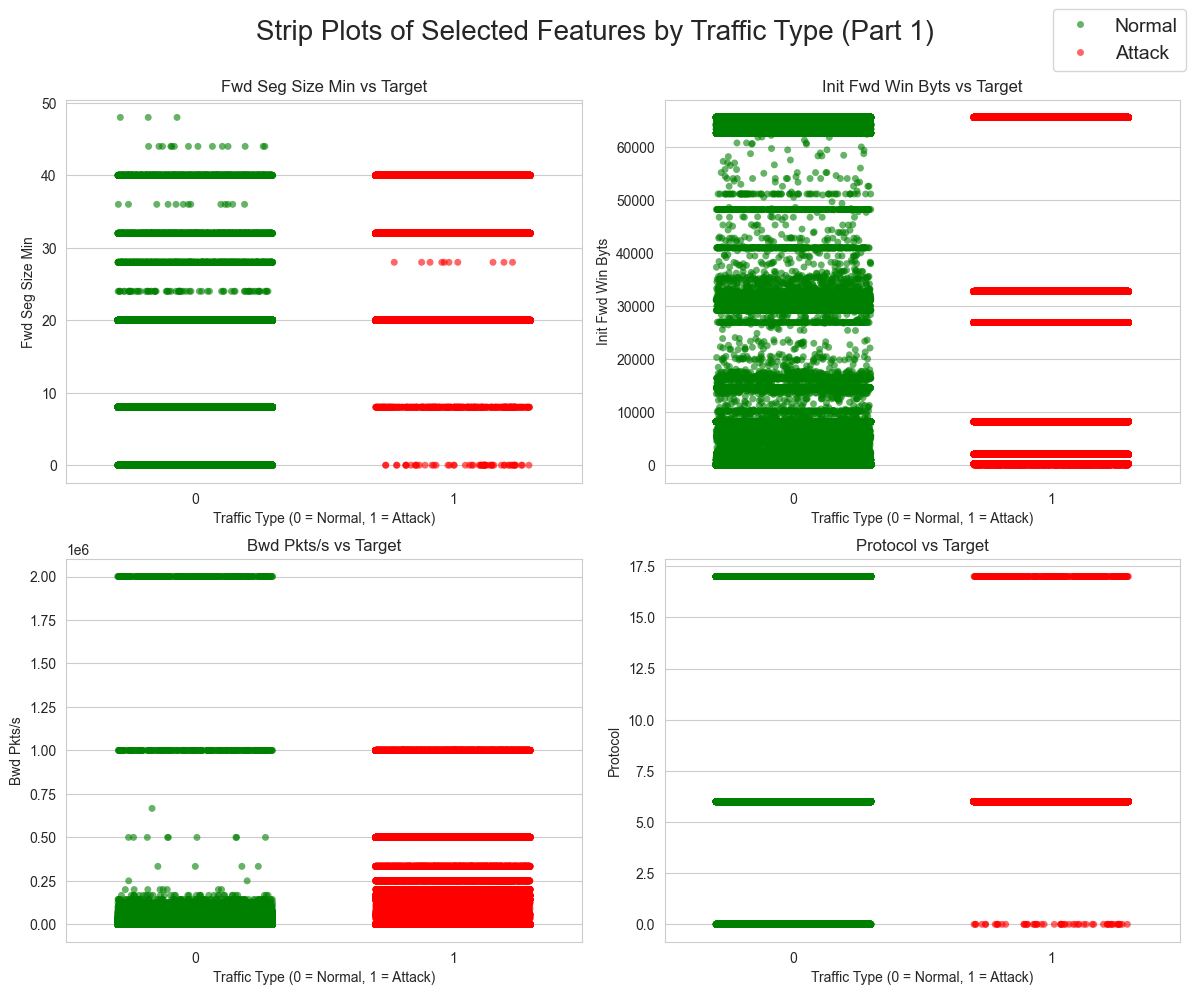

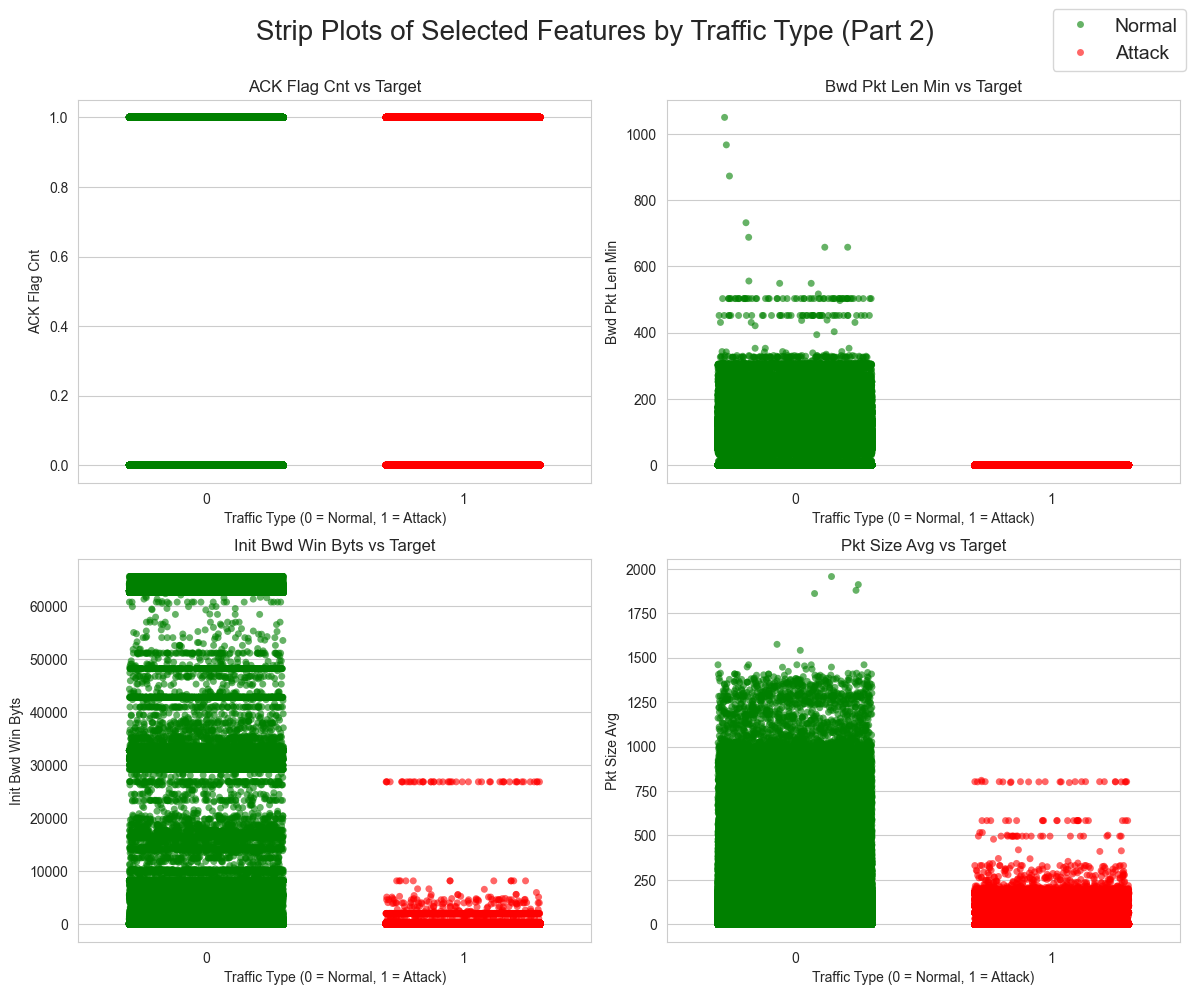

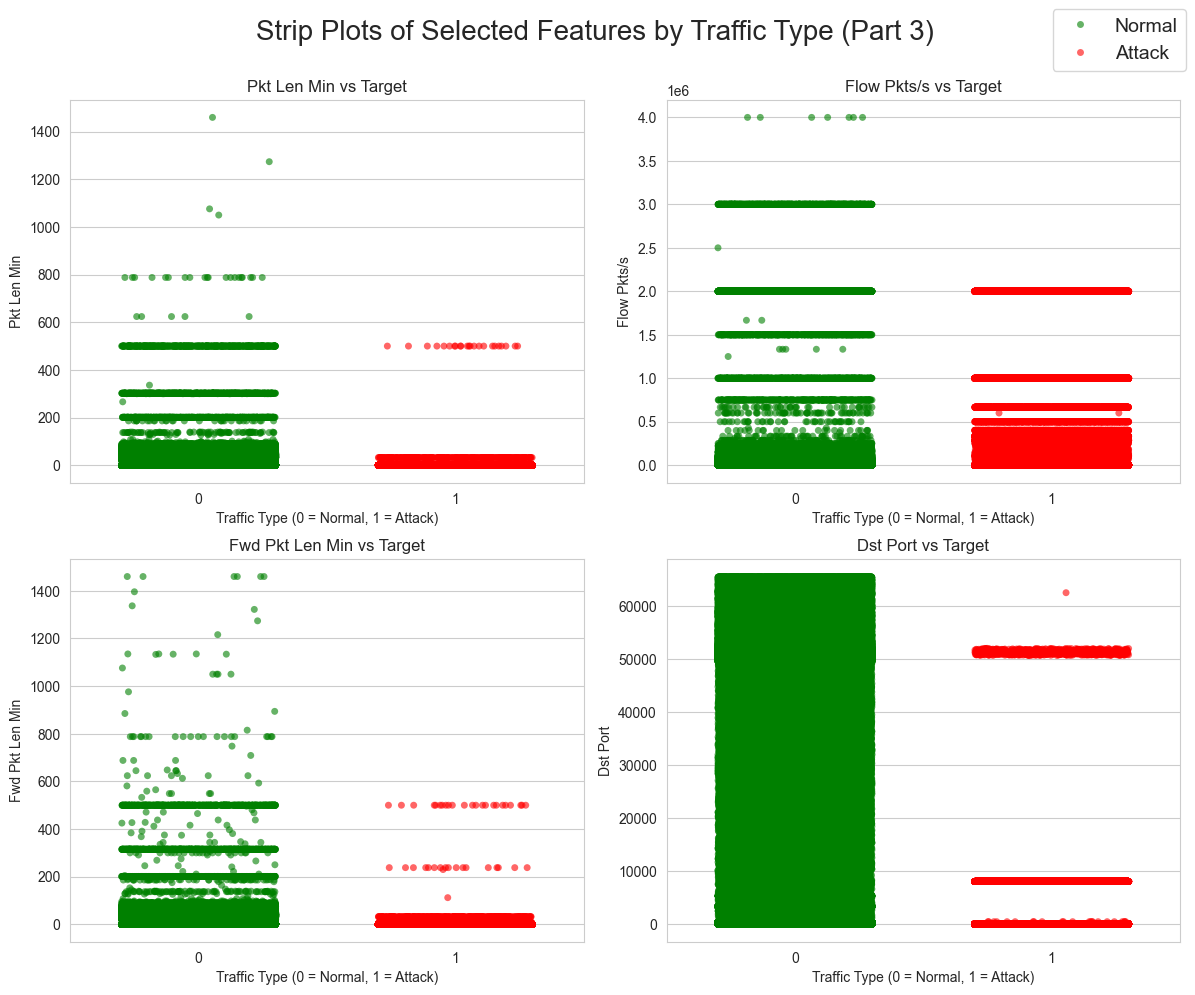

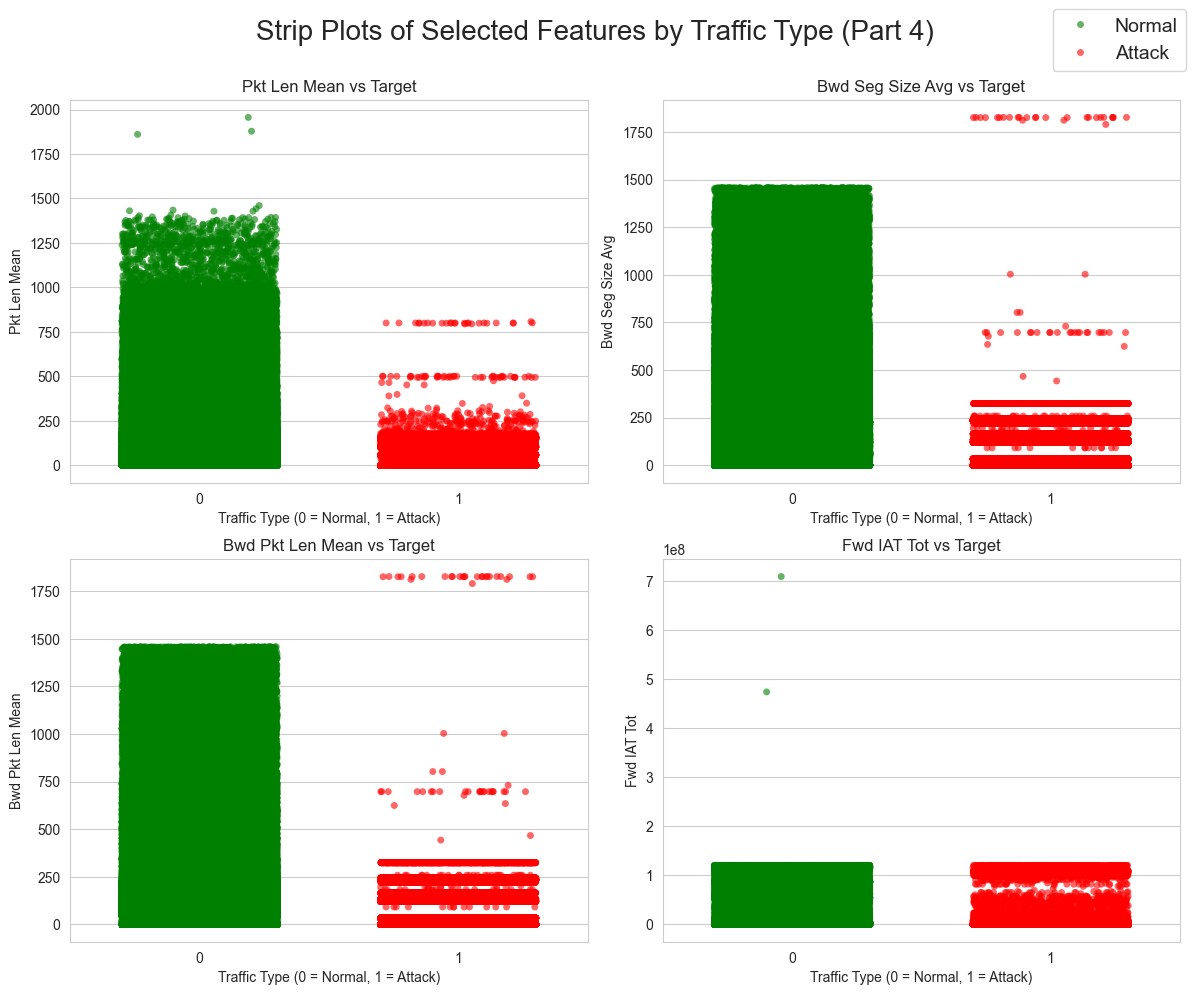

In [7]:
sns.set_style('whitegrid')

features_per_plot = 4  # 4 plots per figure

for plot_idx in range(4):  # 4 figures
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'Strip Plots of Selected Features by Traffic Type (Part {plot_idx + 1})', fontsize=20)

    for i in range(features_per_plot):
        feature_idx = plot_idx * features_per_plot + i
        if feature_idx >= len(top_features):
            break

        feature = top_features[feature_idx]
        row, col = divmod(i, 2)

        sns.stripplot(
            data=eda_df, x='target', y=feature, hue='target', dodge=False,
            jitter=0.3, alpha=0.6, ax=axes[row, col], palette={0: 'green', 1: 'red'}
        )
        axes[row, col].set_title(f'{feature} vs Target')
        axes[row, col].legend_.remove()
        axes[row, col].set_xlabel("Traffic Type (0 = Normal, 1 = Attack)")

    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, ['Normal', 'Attack'], loc='upper right', fontsize=14)

    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

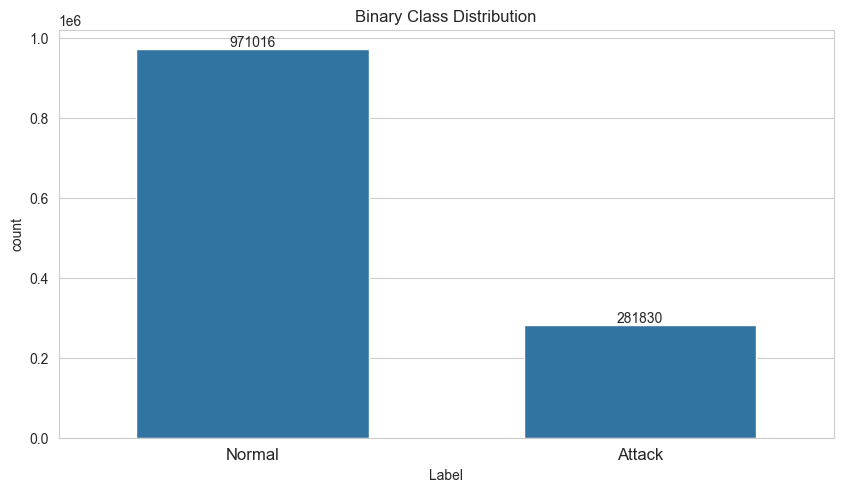

In [8]:
mapped_labels = Y_bin.map({0: 'Normal', 1: 'Attack'})

plt.figure(figsize=(10, 6))
ax = sns.countplot(x=mapped_labels, width=0.6)
plt.title("Binary Class Distribution")

plt.xticks(ha='center', fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.1,
        int(height),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.subplots_adjust(bottom=0.2)
plt.show()

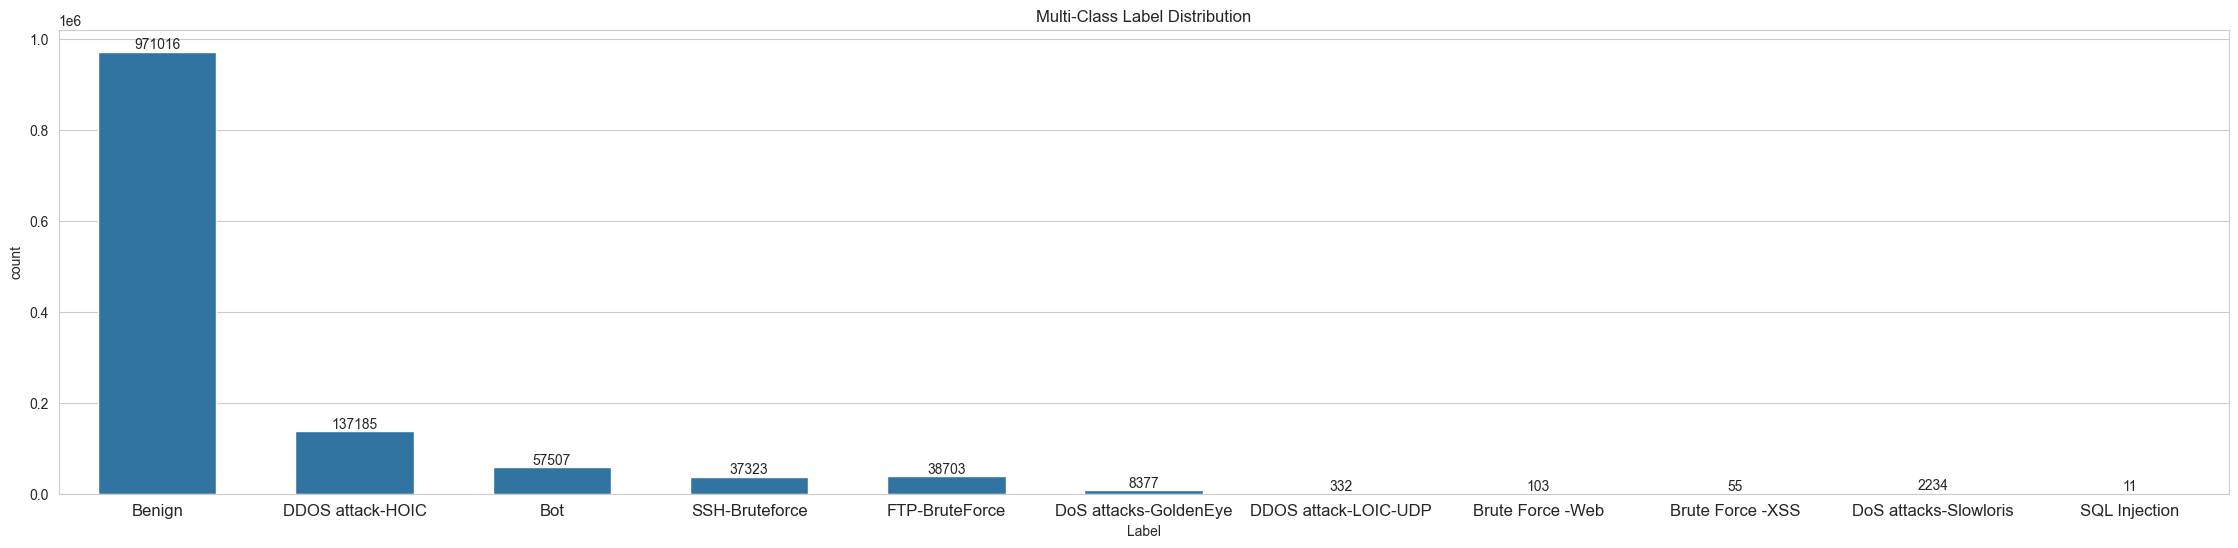

In [9]:
label_dict = {
    0: 'Benign',
    1: 'FTP-BruteForce',
    2: 'SSH-Bruteforce',
    3: 'DDOS attack-HOIC',
    4: 'Bot',
    5: 'DoS attacks-GoldenEye',
    6: 'DoS attacks-Slowloris',
    7: 'DDOS attack-LOIC-UDP',
    8: 'Brute Force -Web',
    9: 'Brute Force -XSS',
    10: 'SQL Injection'
}

plt.figure(figsize=(28, 8))
ax = sns.countplot(x=Y_multi.map(label_dict), width=0.6)
plt.title("Multi-Class Label Distribution")

plt.xticks(ha='center', fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.1,
        int(height),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.subplots_adjust(bottom=0.3)
plt.show()

In [10]:
#calculate the correlation matrix
corr_matrix = X.corr(numeric_only=True)

# set a threshold for high correlation
threshold = 0.9
high_corr = corr_matrix.abs() > threshold
to_drop = set()

#find cols which have corr greater than threshold
for i in range(len(high_corr.columns)):
    for j in range(i):
        if high_corr.iloc[i, j]:
            colName_i = high_corr.columns[i]
            colName_j = high_corr.columns[j]
            if colName_i not in to_drop and colName_j not in to_drop:
                to_drop.add(colName_j)

#drop cols and store X in new df
X_reduced = X.drop(columns=to_drop)

In [11]:
print("\nData Description Before Normalization:")
print(X_reduced.describe())


Data Description Before Normalization:
           Dst Port      Protocol  Fwd Pkt Len Std  Bwd Pkt Len Min  \
count  1.252846e+06  1.252846e+06     1.252846e+06     1.252846e+06   
mean   9.588155e+03  8.313469e+00     7.700061e+01     2.197513e+01   
std    1.935468e+04  4.619283e+00     1.200345e+02     4.806628e+01   
min    0.000000e+00  0.000000e+00     0.000000e+00     0.000000e+00   
25%    5.300000e+01  6.000000e+00     0.000000e+00     0.000000e+00   
50%    8.000000e+01  6.000000e+00     0.000000e+00     0.000000e+00   
75%    3.389000e+03  6.000000e+00     1.397511e+02     0.000000e+00   
max    6.553400e+04  1.700000e+01     5.579582e+03     1.050000e+03   

        Flow Byts/s   Fwd IAT Tot  Fwd IAT Mean   Fwd IAT Max   Fwd IAT Min  \
count  1.252846e+06  1.252846e+06  1.252846e+06  1.252846e+06  1.252846e+06   
mean   2.629520e+05  1.174706e+07  4.155316e+06  6.583450e+06  4.322050e+06   
std    3.797400e+06  3.063698e+07  7.404482e+08  1.954620e+07  1.742660e+07   
min 

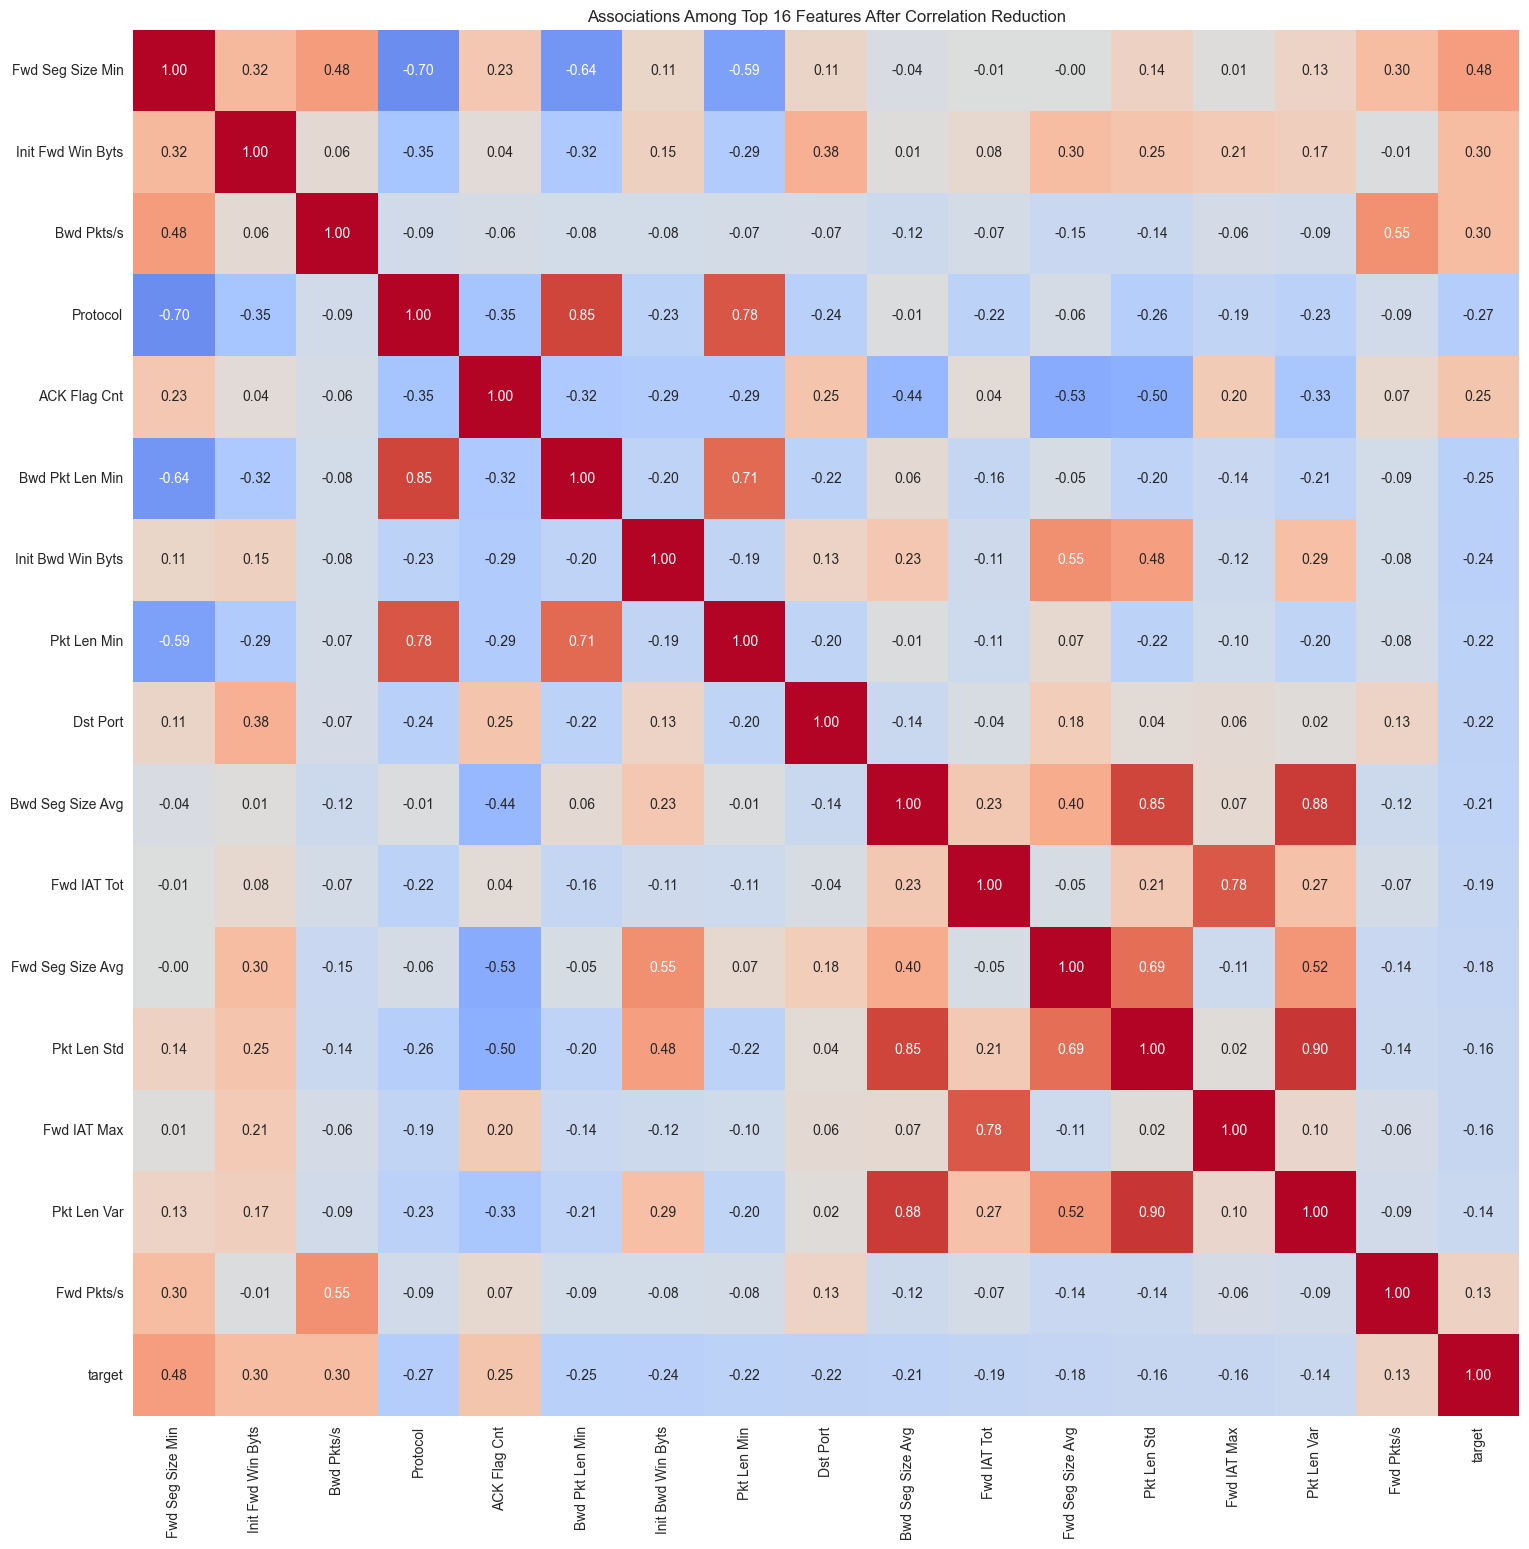

{'corr':                    Fwd Seg Size Min  Init Fwd Win Byts  Bwd Pkts/s  Protocol  \
 Fwd Seg Size Min           1.000000           0.322275    0.484619 -0.695262   
 Init Fwd Win Byts          0.322275           1.000000    0.061032 -0.350785   
 Bwd Pkts/s                 0.484619           0.061032    1.000000 -0.089422   
 Protocol                  -0.695262          -0.350785   -0.089422  1.000000   
 ACK Flag Cnt               0.228171           0.038825   -0.058614 -0.354147   
 Bwd Pkt Len Min           -0.644815          -0.319192   -0.081961  0.851533   
 Init Bwd Win Byts          0.107274           0.150700   -0.081186 -0.225162   
 Pkt Len Min               -0.592291          -0.293143   -0.074379  0.782197   
 Dst Port                   0.114142           0.375721   -0.065790 -0.242222   
 Bwd Seg Size Avg          -0.036310           0.011292   -0.119714 -0.011447   
 Fwd IAT Tot               -0.005518           0.076330   -0.072209 -0.219078   
 Fwd Seg Size Avg   

In [12]:
eda_df = X_reduced.copy()
eda_df['target'] = Y_bin.reset_index(drop=True)

correlations = eda_df.corr(numeric_only=True)['target'].abs().sort_values(ascending=False)
top_features = correlations.drop('target').head(16).index.tolist()

subset_df = eda_df[top_features + ['target']]

associations(
    subset_df,
    nominal_columns='auto',
    figsize=(18, 18),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    title="Associations Among Top 16 Features After Correlation Reduction",
    cbar=False
)

In [13]:
#normalize the data using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X_reduced)
X_normalized = pd.DataFrame(normalized_data, columns=X_reduced.columns)

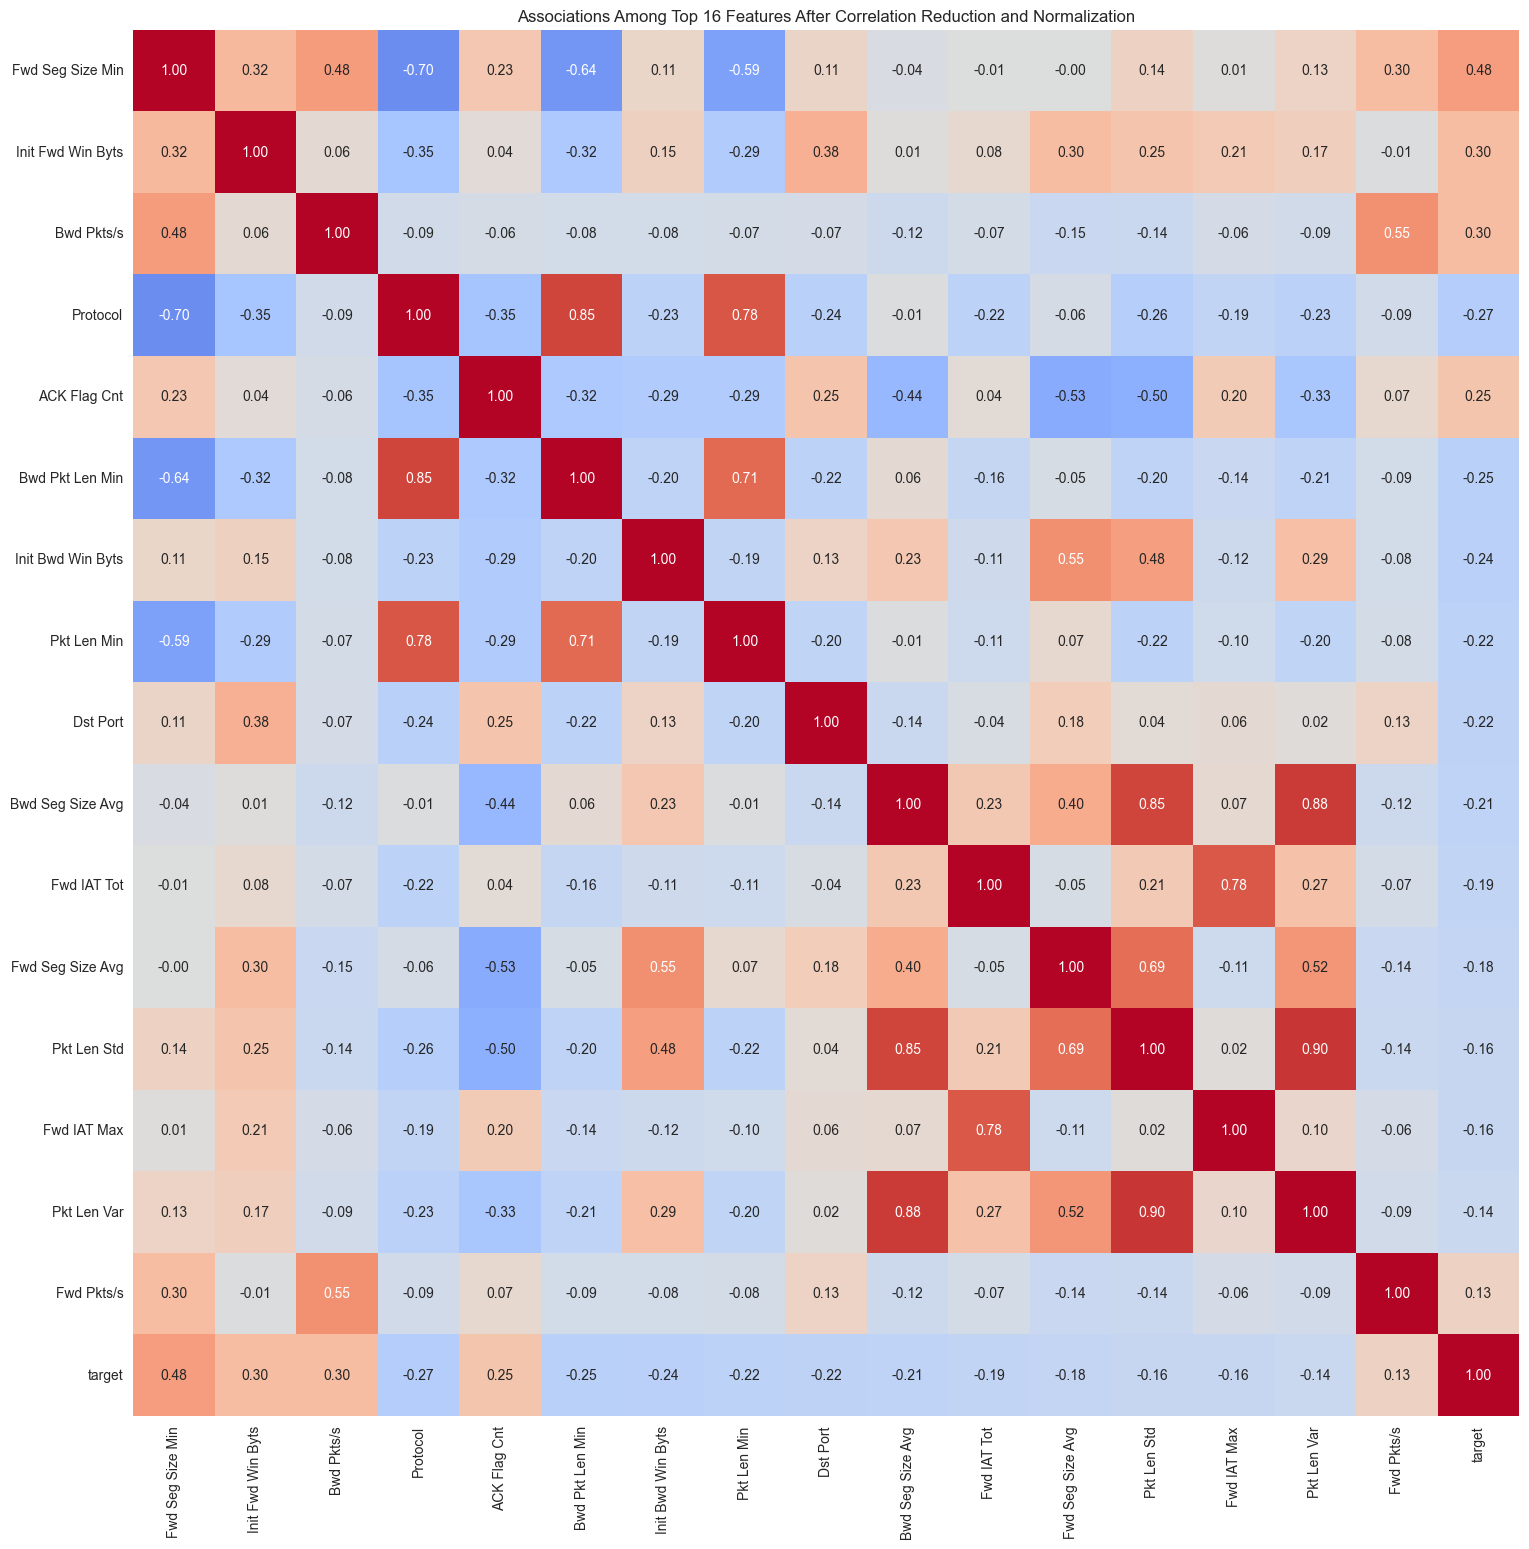

{'corr':                    Fwd Seg Size Min  Init Fwd Win Byts  Bwd Pkts/s  Protocol  \
 Fwd Seg Size Min           1.000000           0.322275    0.484619 -0.695262   
 Init Fwd Win Byts          0.322275           1.000000    0.061032 -0.350785   
 Bwd Pkts/s                 0.484619           0.061032    1.000000 -0.089422   
 Protocol                  -0.695262          -0.350785   -0.089422  1.000000   
 ACK Flag Cnt               0.228171           0.038825   -0.058614 -0.354147   
 Bwd Pkt Len Min           -0.644815          -0.319192   -0.081961  0.851533   
 Init Bwd Win Byts          0.107274           0.150700   -0.081186 -0.225162   
 Pkt Len Min               -0.592291          -0.293143   -0.074379  0.782197   
 Dst Port                   0.114142           0.375721   -0.065790 -0.242222   
 Bwd Seg Size Avg          -0.036310           0.011292   -0.119714 -0.011447   
 Fwd IAT Tot               -0.005518           0.076330   -0.072209 -0.219078   
 Fwd Seg Size Avg   

In [14]:
eda_df = X_normalized.copy()
eda_df['target'] = Y_bin.reset_index(drop=True)

correlations = eda_df.corr(numeric_only=True)['target'].abs().sort_values(ascending=False)
top_features = correlations.drop('target').head(16).index.tolist()

subset_df = eda_df[top_features + ['target']]

# Associations plot with updated title
associations(
    subset_df,
    nominal_columns='auto',
    figsize=(18, 18),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    title="Associations Among Top 16 Features After Correlation Reduction and Normalization",
    cbar=False
)

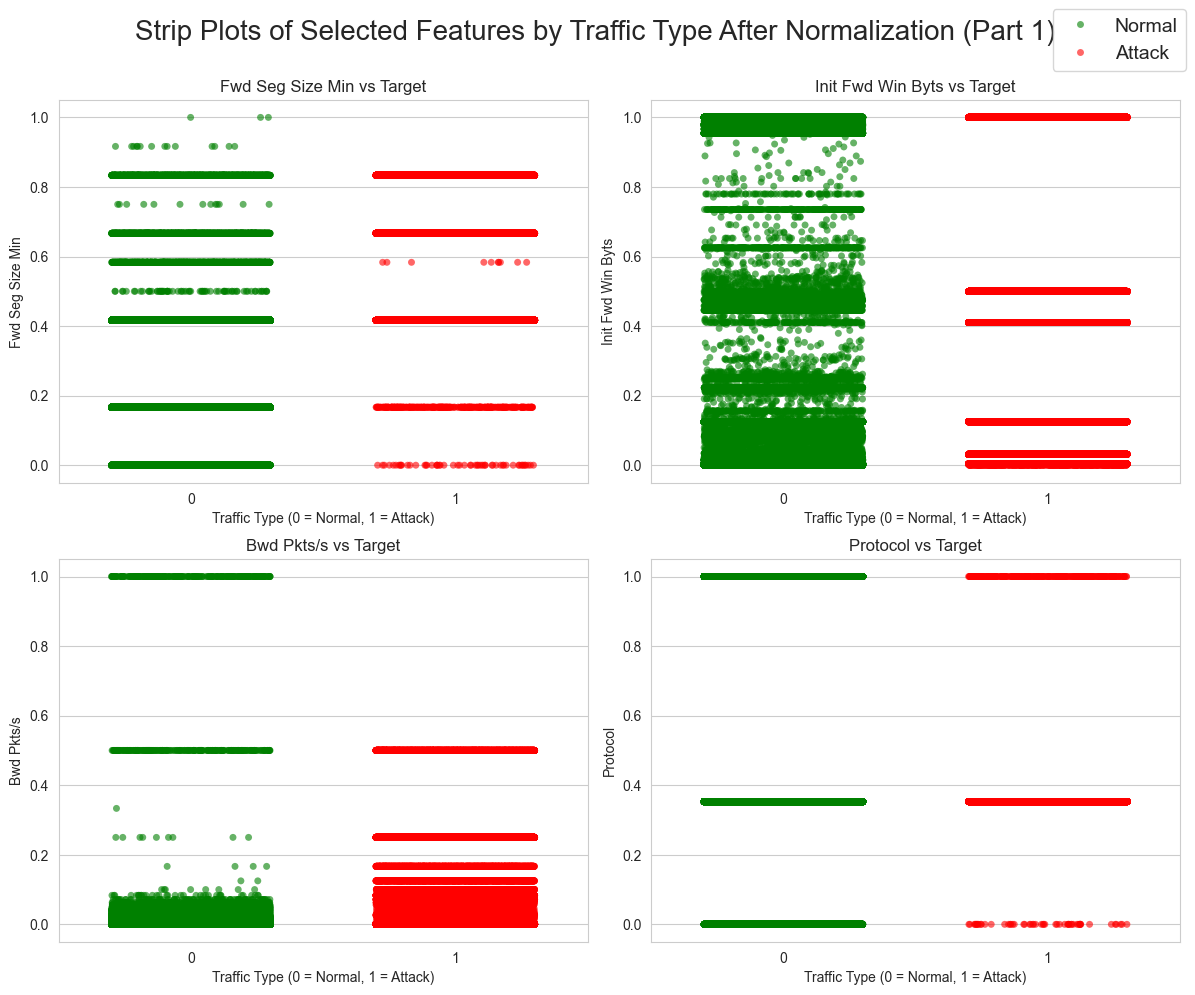

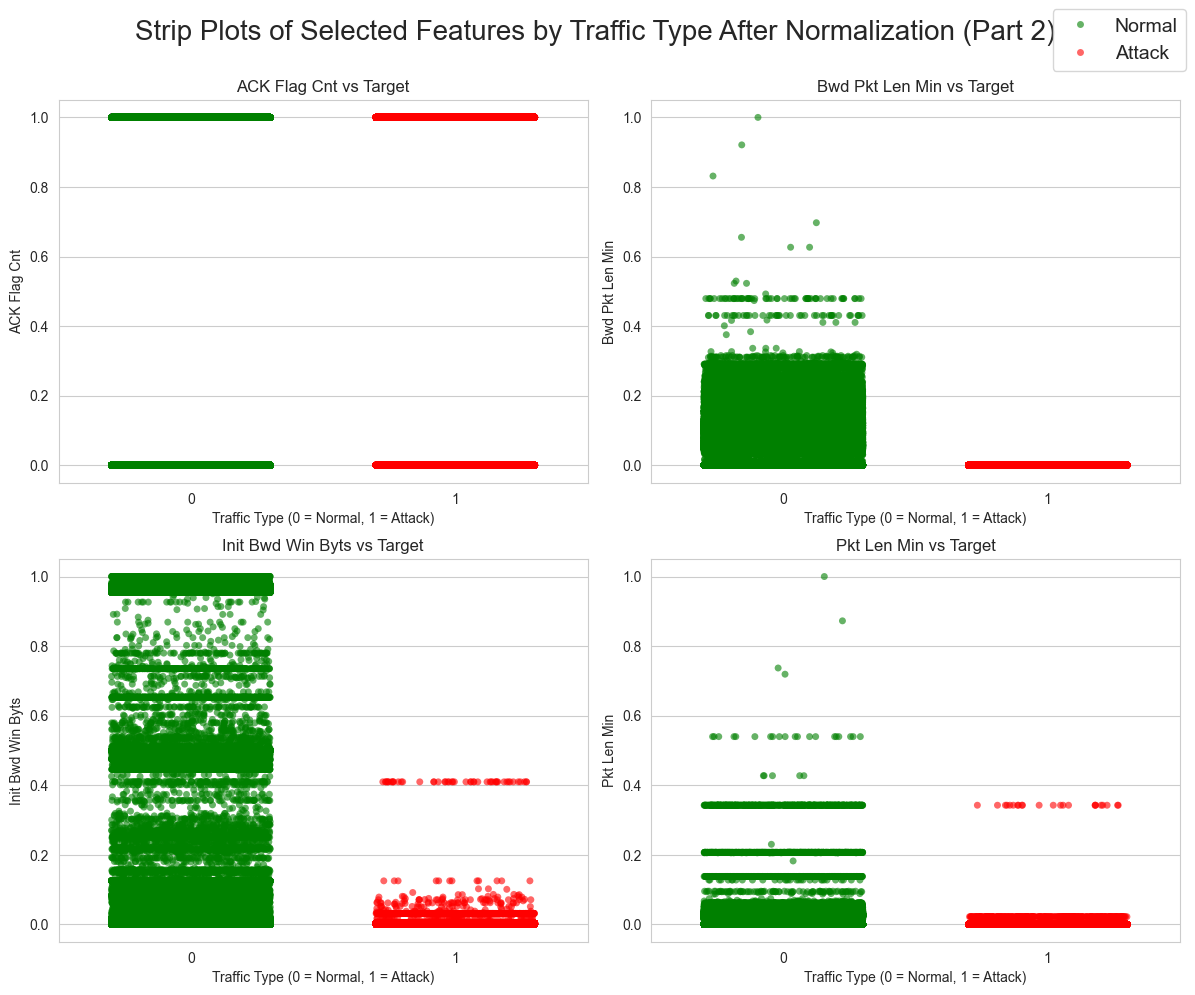

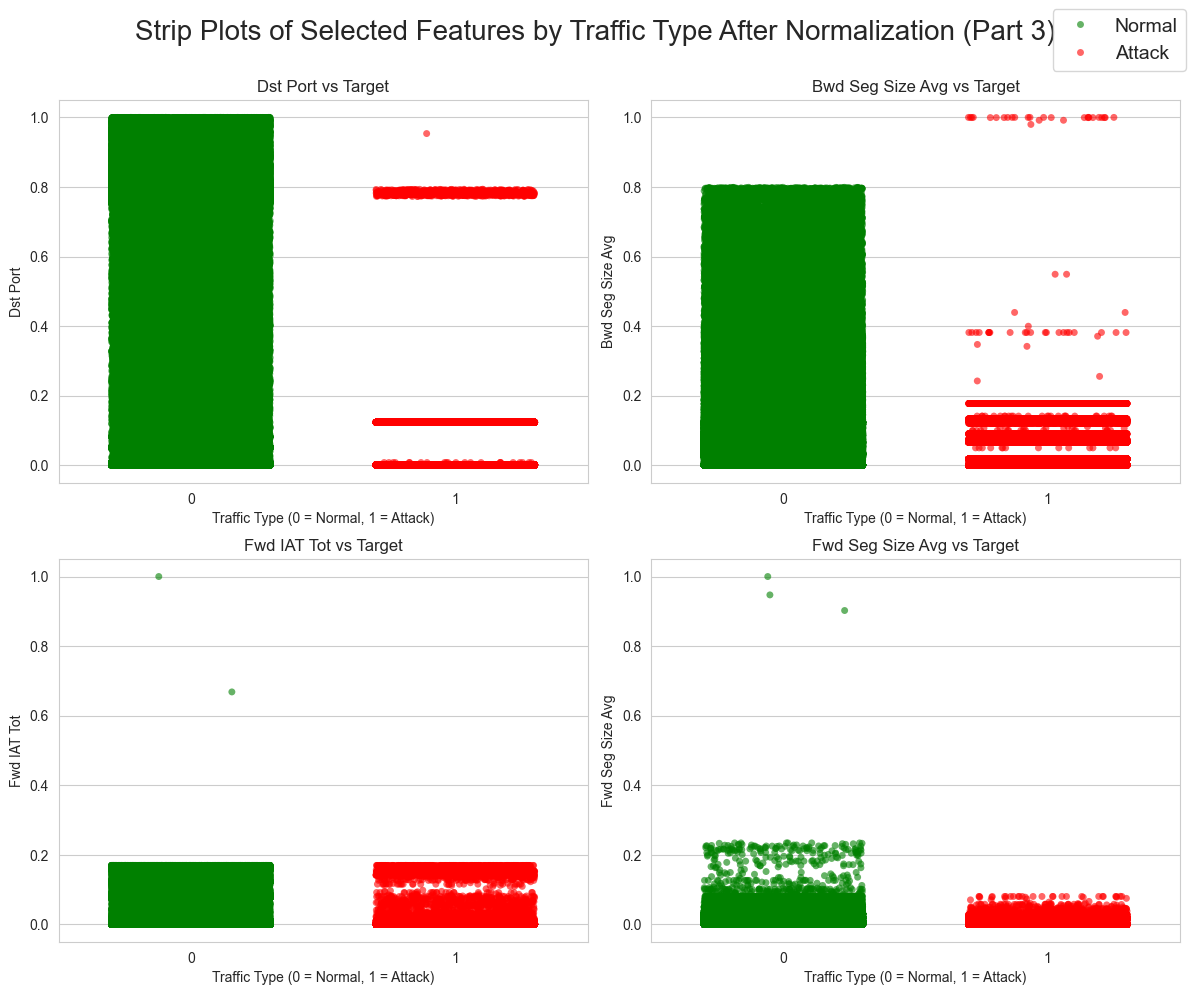

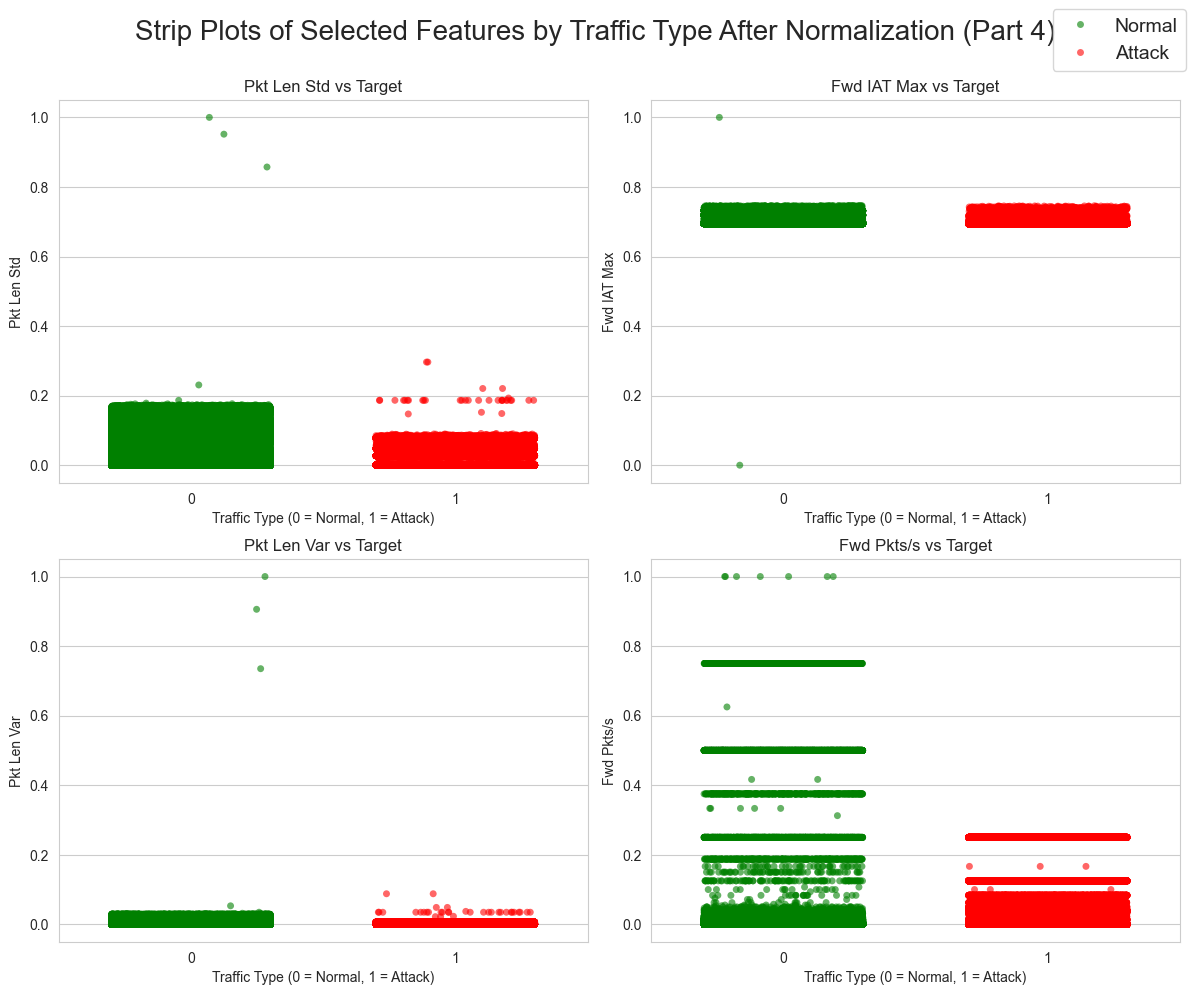

In [15]:
sns.set_style('whitegrid')

features_per_plot = 4  # 4 plots per figure

for plot_idx in range(4):  # 4 figures
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'Strip Plots of Selected Features by Traffic Type After Normalization (Part {plot_idx + 1})', fontsize=20)

    for i in range(features_per_plot):
        feature_idx = plot_idx * features_per_plot + i
        if feature_idx >= len(top_features):
            break

        feature = top_features[feature_idx]
        row, col = divmod(i, 2)

        sns.stripplot(
            data=eda_df, x='target', y=feature, hue='target', dodge=False,
            jitter=0.3, alpha=0.6, ax=axes[row, col], palette={0: 'green', 1: 'red'}
        )
        axes[row, col].set_title(f'{feature} vs Target')
        axes[row, col].legend_.remove()
        axes[row, col].set_xlabel("Traffic Type (0 = Normal, 1 = Attack)")

    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, ['Normal', 'Attack'], loc='upper right', fontsize=14)

    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

In [16]:
print("\nData Description After Normalization:")
print(X_normalized.describe())


Data Description After Normalization:
           Dst Port      Protocol  Fwd Pkt Len Std  Bwd Pkt Len Min  \
count  1.252846e+06  1.252846e+06     1.252846e+06     1.252846e+06   
mean   1.463081e-01  4.890276e-01     1.380043e-02     2.092869e-02   
std    2.953380e-01  2.717225e-01     2.151317e-02     4.577741e-02   
min    0.000000e+00  0.000000e+00     0.000000e+00     0.000000e+00   
25%    8.087405e-04  3.529412e-01     0.000000e+00     0.000000e+00   
50%    1.220740e-03  3.529412e-01     0.000000e+00     0.000000e+00   
75%    5.171361e-02  3.529412e-01     2.504687e-02     0.000000e+00   
max    1.000000e+00  1.000000e+00     1.000000e+00     1.000000e+00   

        Flow Byts/s   Fwd IAT Tot  Fwd IAT Mean   Fwd IAT Max   Fwd IAT Min  \
count  1.252846e+06  1.252846e+06  1.252846e+06  1.252846e+06  1.252846e+06   
mean   2.025044e-04  1.657578e-02  9.998601e-01  6.972646e-01  3.423227e-03   
std    2.924451e-03  4.323055e-02  8.938941e-04  8.427981e-03  1.380253e-02   
min  

In [17]:
print(f"Min value of X after Normalization: {X_normalized.min().min()}")
print(f"Max value of X after Normalization: {X_normalized.max().max()}")

Min value of X after Normalization: 0.0
Max value of X after Normalization: 1.0


In [18]:
#free memory
del df1
del X
del X_reduced
del eda_df
del subset_df
del correlations
del top_features

In [19]:
#split dataframe into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y_bin, test_size=0.25, stratify=Y_bin, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (939634, 49)
X_test shape: (313212, 49)
y_train shape: (939634,)
y_test shape: (313212,)


In [20]:
# Export to CSV
X_train.to_csv("X_train_bin.csv", index=False)
X_test.to_csv("X_test_bin.csv", index=False)
y_train.to_csv("y_train_bin.csv", index=False)
y_test.to_csv("y_test_bin.csv", index=False)

In [21]:
del Y_bin
del X_train
del X_test
del y_train
del y_test

In [22]:
#split dataframe into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y_multi, test_size=0.25, stratify=Y_multi, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (939634, 49)
X_test shape: (313212, 49)
y_train shape: (939634,)
y_test shape: (313212,)


In [23]:
# Export to CSV
X_train.to_csv("X_train_multi.csv", index=False)
X_test.to_csv("X_test_multi.csv", index=False)
y_train.to_csv("y_train_multi.csv", index=False)
y_test.to_csv("y_test_multi.csv", index=False)

In [24]:
#free memory
del X_normalized
del X_train
del X_test
del y_train
del y_test